In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read dataset files
df = pd.read_csv('dataset/train_data_cleaned.csv')
df.head()

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Split features and labels
X = df.drop('credit_card_default', axis=1)
y = df['credit_card_default']
target_names = ["no-default", "default"]

print(X.shape, y.shape)

(43508, 32) (43508,)


In [4]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [6]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [8]:
X_train_scaled.shape

(32631, 32)

### Create a Neural Network Model with 1 Hiden Layer

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Create model and add 1 hiden layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=2, activation='softmax'))

In [11]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3300      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 3,502
Trainable params: 3,502
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train_scaled, 
                    y_train_categorical, 
                    epochs=100,
                    shuffle=True,
                    verbose=2,                    
                    validation_data=(X_test_scaled, y_test_categorical)
                   )

Epoch 1/100
1020/1020 - 1s - loss: 0.0767 - accuracy: 0.9754 - val_loss: 0.0549 - val_accuracy: 0.9793
Epoch 2/100
1020/1020 - 1s - loss: 0.0506 - accuracy: 0.9801 - val_loss: 0.0561 - val_accuracy: 0.9761
Epoch 3/100
1020/1020 - 1s - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.0545 - val_accuracy: 0.9775
Epoch 4/100
1020/1020 - 1s - loss: 0.0479 - accuracy: 0.9801 - val_loss: 0.0557 - val_accuracy: 0.9783
Epoch 5/100
1020/1020 - 1s - loss: 0.0474 - accuracy: 0.9803 - val_loss: 0.0553 - val_accuracy: 0.9794
Epoch 6/100
1020/1020 - 1s - loss: 0.0468 - accuracy: 0.9802 - val_loss: 0.0543 - val_accuracy: 0.9786
Epoch 7/100
1020/1020 - 1s - loss: 0.0464 - accuracy: 0.9804 - val_loss: 0.0562 - val_accuracy: 0.9772
Epoch 8/100
1020/1020 - 1s - loss: 0.0459 - accuracy: 0.9808 - val_loss: 0.0540 - val_accuracy: 0.9757
Epoch 9/100
1020/1020 - 1s - loss: 0.0454 - accuracy: 0.9809 - val_loss: 0.0554 - val_accuracy: 0.9785
Epoch 10/100
1020/1020 - 1s - loss: 0.0453 - accuracy: 0.9805 - val_loss:

Epoch 80/100
1020/1020 - 1s - loss: 0.0272 - accuracy: 0.9887 - val_loss: 0.0711 - val_accuracy: 0.9729
Epoch 81/100
1020/1020 - 1s - loss: 0.0274 - accuracy: 0.9879 - val_loss: 0.0720 - val_accuracy: 0.9747
Epoch 82/100
1020/1020 - 1s - loss: 0.0266 - accuracy: 0.9885 - val_loss: 0.0764 - val_accuracy: 0.9732
Epoch 83/100
1020/1020 - 1s - loss: 0.0264 - accuracy: 0.9887 - val_loss: 0.0714 - val_accuracy: 0.9748
Epoch 84/100
1020/1020 - 1s - loss: 0.0268 - accuracy: 0.9887 - val_loss: 0.0772 - val_accuracy: 0.9741
Epoch 85/100
1020/1020 - 1s - loss: 0.0261 - accuracy: 0.9884 - val_loss: 0.0755 - val_accuracy: 0.9722
Epoch 86/100
1020/1020 - 1s - loss: 0.0259 - accuracy: 0.9888 - val_loss: 0.0777 - val_accuracy: 0.9720
Epoch 87/100
1020/1020 - 1s - loss: 0.0253 - accuracy: 0.9888 - val_loss: 0.0780 - val_accuracy: 0.9729
Epoch 88/100
1020/1020 - 1s - loss: 0.0256 - accuracy: 0.9888 - val_loss: 0.0780 - val_accuracy: 0.9754
Epoch 89/100
1020/1020 - 1s - loss: 0.0255 - accuracy: 0.9892 - 

### Create a Deep Learning Model with 2 Hiden Layers

In [14]:
# Create model and add two hiden layers
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [15]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 13,602
Trainable params: 13,602
Non-trainable params: 0
_________________________________________________________________


In [17]:
deep_history = deep_model.fit(X_train_scaled, 
                    y_train_categorical, 
                    epochs=100,
                    shuffle=True,
                    verbose=2,                    
                    validation_data=(X_test_scaled, y_test_categorical)
                   )

Epoch 1/100
1020/1020 - 1s - loss: 0.0763 - accuracy: 0.9769 - val_loss: 0.0620 - val_accuracy: 0.9785
Epoch 2/100
1020/1020 - 1s - loss: 0.0517 - accuracy: 0.9793 - val_loss: 0.0573 - val_accuracy: 0.9762
Epoch 3/100
1020/1020 - 1s - loss: 0.0510 - accuracy: 0.9796 - val_loss: 0.0548 - val_accuracy: 0.9781
Epoch 4/100
1020/1020 - 1s - loss: 0.0478 - accuracy: 0.9802 - val_loss: 0.0551 - val_accuracy: 0.9767
Epoch 5/100
1020/1020 - 1s - loss: 0.0463 - accuracy: 0.9807 - val_loss: 0.0536 - val_accuracy: 0.9779
Epoch 6/100
1020/1020 - 1s - loss: 0.0455 - accuracy: 0.9810 - val_loss: 0.0535 - val_accuracy: 0.9773
Epoch 7/100
1020/1020 - 1s - loss: 0.0447 - accuracy: 0.9810 - val_loss: 0.0529 - val_accuracy: 0.9782
Epoch 8/100
1020/1020 - 1s - loss: 0.0436 - accuracy: 0.9815 - val_loss: 0.0521 - val_accuracy: 0.9771
Epoch 9/100
1020/1020 - 1s - loss: 0.0441 - accuracy: 0.9810 - val_loss: 0.0534 - val_accuracy: 0.9784
Epoch 10/100
1020/1020 - 1s - loss: 0.0416 - accuracy: 0.9814 - val_loss:

Epoch 80/100
1020/1020 - 1s - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.2291 - val_accuracy: 0.9715
Epoch 81/100
1020/1020 - 1s - loss: 0.0066 - accuracy: 0.9973 - val_loss: 0.2315 - val_accuracy: 0.9698
Epoch 82/100
1020/1020 - 1s - loss: 0.0055 - accuracy: 0.9977 - val_loss: 0.2384 - val_accuracy: 0.9732
Epoch 83/100
1020/1020 - 1s - loss: 0.0091 - accuracy: 0.9965 - val_loss: 0.2211 - val_accuracy: 0.9692
Epoch 84/100
1020/1020 - 1s - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.2370 - val_accuracy: 0.9716
Epoch 85/100
1020/1020 - 1s - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.2425 - val_accuracy: 0.9702
Epoch 86/100
1020/1020 - 1s - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.2421 - val_accuracy: 0.9697
Epoch 87/100
1020/1020 - 1s - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.2274 - val_accuracy: 0.9713
Epoch 88/100
1020/1020 - 1s - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.2377 - val_accuracy: 0.9722
Epoch 89/100
1020/1020 - 1s - loss: 0.0052 - accuracy: 0.9979 - 

### Quantify the Trained Model

In [18]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

340/340 - 0s - loss: 0.0868 - accuracy: 0.9754
Normal Neural Network - Loss: 0.08680441975593567, Accuracy: 0.9753608703613281


In [19]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Learning Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

340/340 - 0s - loss: 0.2608 - accuracy: 0.9706
Deep Learning Neural Network - Loss: 0.26076966524124146, Accuracy: 0.9705801010131836


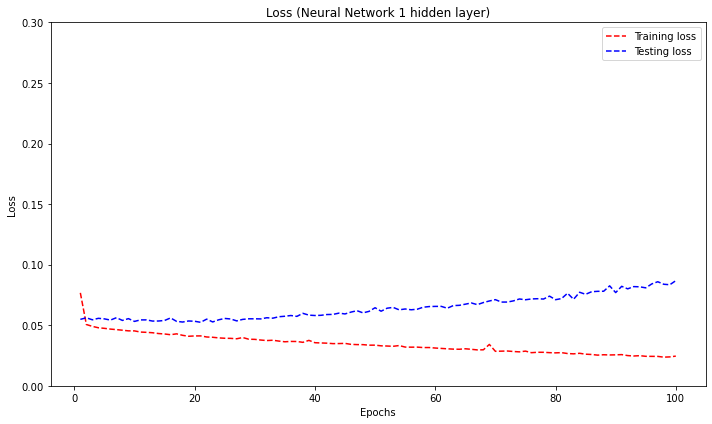

In [49]:
# plot loss for 1 hiden layer

loss_train = history.history['loss']
loss_test = history.history['val_loss']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, loss_train, 'r--', label='Training loss')
plt.plot(epochs, loss_test, 'b--', label='Testing loss')
plt.title('Loss (Neural Network 1 hidden layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.savefig('static/images/neural_network_loss.jpg', dpi=300)
plt.show()

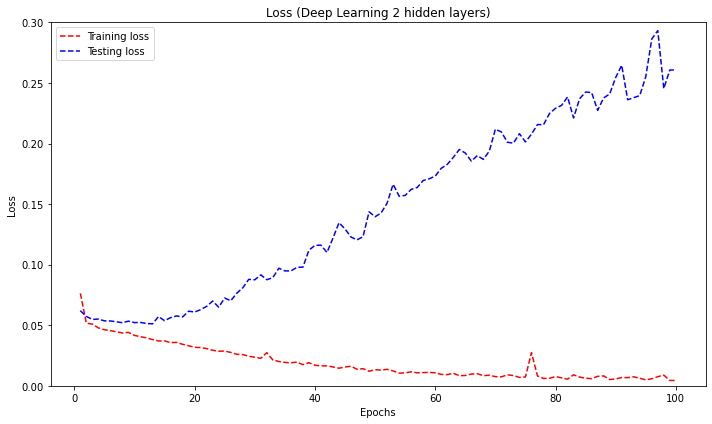

In [50]:
# plot loss with 2 hiden layers
deep_loss_train = deep_history.history['loss']
deep_loss_test = deep_history.history['val_loss']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, deep_loss_train, 'r--', label='Training loss')
plt.plot(epochs, deep_loss_test, 'b--', label='Testing loss')
plt.title('Loss (Deep Learning 2 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.savefig('static/images/deep_learning_loss.jpg', dpi=300)
plt.show()

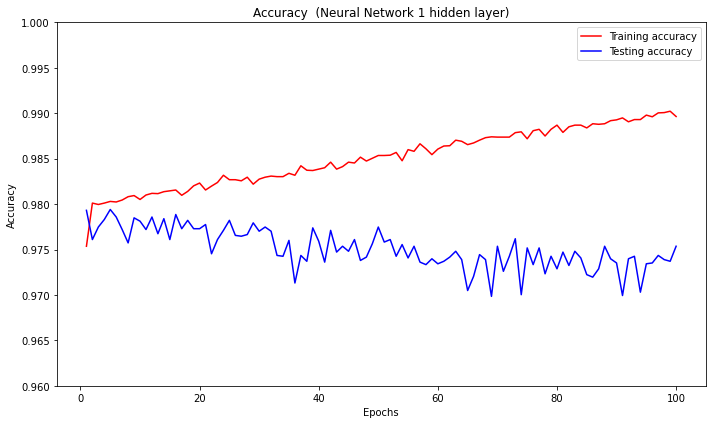

In [41]:
# plot accuracy with 1 hiden layer
accuracy_train = history.history['accuracy']
accuracy_test = history.history['val_accuracy']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy')
plt.title('Accuracy  (Neural Network 1 hidden layer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.96,1)
plt.legend()
plt.tight_layout()
plt.savefig('static/images/neural_network_accuracy.jpg', dpi=300)
plt.show()

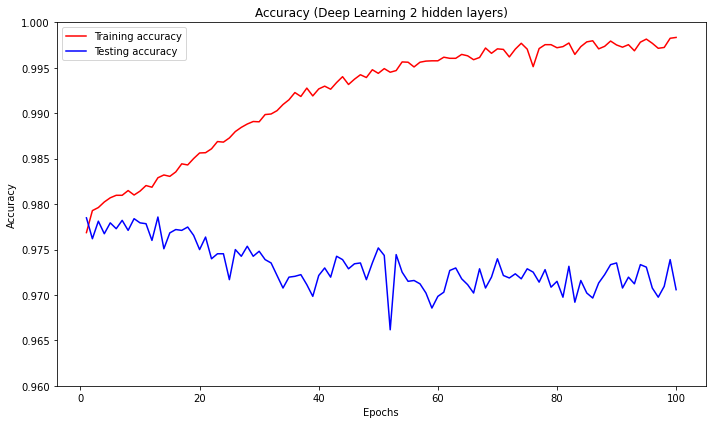

In [42]:
# plot accuracy with 2 hiden layers
deep_accuracy_train = deep_history.history['accuracy']
deep_accuracy_test = deep_history.history['val_accuracy']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, deep_accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, deep_accuracy_test, 'b', label='Testing accuracy')
plt.title('Accuracy (Deep Learning 2 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.96,1)
plt.legend()
plt.tight_layout()
plt.savefig('static/images/deep_learning_accuracy.jpg', dpi=300)
plt.show()

### Classification report

In [24]:
from numpy import argmax

In [25]:
 # Calculate classification report
from sklearn.metrics import classification_report
model_predictions = model.predict(X_test_scaled)
print(classification_report(y_test, argmax(model_predictions, axis=1),
                            target_names=target_names))

              precision    recall  f1-score   support

  no-default       0.98      0.99      0.99      9960
     default       0.90      0.79      0.84       917

    accuracy                           0.98     10877
   macro avg       0.94      0.89      0.92     10877
weighted avg       0.97      0.98      0.97     10877



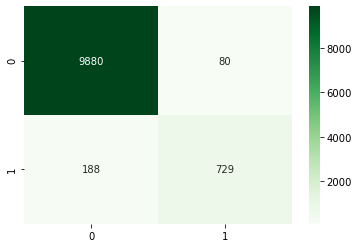

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 1 layer
sns.heatmap(confusion_matrix(y_test, argmax(model_predictions, axis=1)), cmap="Greens", annot = True, fmt="d")
plt.savefig('static/images/neural_network_confusion.jpg', dpi=300)

In [27]:
# deep learning model
deep_model_predictions = deep_model.predict(X_test_scaled)
print(classification_report(y_test, argmax(deep_model_predictions, axis=1),
                            target_names=target_names))

              precision    recall  f1-score   support

  no-default       0.98      0.98      0.98      9960
     default       0.82      0.83      0.83       917

    accuracy                           0.97     10877
   macro avg       0.90      0.91      0.91     10877
weighted avg       0.97      0.97      0.97     10877



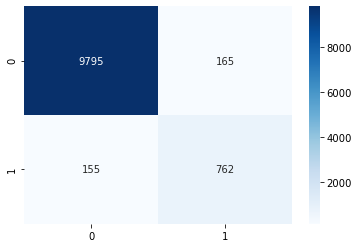

In [55]:
# Confusion Matrix deep learning
sns.heatmap(confusion_matrix(y_test, argmax(deep_model_predictions, axis=1)), cmap="Blues", annot = True, fmt="d")
plt.savefig('static/images/deep_learning_confusion.jpg', dpi=300)

In [29]:
# Save the model
model.save("saved_models/neural_network_trained.h5")

In [30]:
# Save the deep learning model
deep_model.save("saved_models/neural_network_deep_trained.h5")

In [31]:
# Load the model
from tensorflow.keras.models import load_model
model_trained = load_model("saved_models/neural_network_trained.h5")
deep_trained = load_model("saved_models/neural_network_deep_trained.h5")

In [32]:
model_loss, model_accuracy = model_trained.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

340/340 - 0s - loss: 0.0868 - accuracy: 0.9754
Normal Neural Network - Loss: 0.08680441975593567, Accuracy: 0.9753608703613281


In [33]:
deep_model_loss, deep_model_accuracy = deep_trained.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Learning Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

340/340 - 0s - loss: 0.2608 - accuracy: 0.9706
Deep Learning Neural Network - Loss: 0.26076966524124146, Accuracy: 0.9705801010131836
